In [2]:
import sqlite3
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

## step 1 - generate meta data sheet for understanding variables and relationsip

run the meta_generation.ipynb, and look at the `data_master.xlsx` for detail information

## step2 - demo on specific questions

### **demo 1 - rate trends**
We want to know the rates trend (changes in year) among different states

In [4]:
# import data
rates = pd.read_csv('./data/Rate.csv')

First we look at the median rate of PrimarySubscriber with different number of dependent(s) among different states. 

The pivot table showed anomaly number, that is rate should below 100 while may cases is over 100. We then dig into the raw data itself for trouble shooting.

In [8]:
rates.pivot_table(index='StateCode', values=['PrimarySubscriberAndOneDependent','PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents'], aggfunc=['median'])

median  \
          PrimarySubscriberAndOneDependent   
StateCode                                    
AK                                  95.920   
AL                                  38.930   
AR                                  49.360   
AZ                                  59.260   
DE                                  50.330   
FL                                  32.270   
GA                                  49.340   
IA                                  45.180   
ID                                  52.490   
IL                                  71.860   
IN                                  56.200   
KS                                  44.410   
LA                                  51.510   
ME                                  37.460   
MI                                  71.360   
MO                                  52.720   
MS                                  73.975   
MT                                  29.135   
NC                                  54.540   
ND                                  50.740   
NE                                  47.365   
NH                                  54.795   
NJ                                  61.120   
NM                                  54.210   
OH                                  58.170   
OK                                  55.200   
PA                                  50.165   
SC                                  49.530   
SD                                  59.115   
TN                                  53.870   
TX                                  42.050   
UT                                  72.850   
VA                                  56.780   
WI                                  65.460   
WV                                  45.075   
WY                                  57.230   

                                                     \
          PrimarySubscriberAndThreeOrMoreDependents   
StateCode                                             
AK                                          116.880   
AL                                           85.640   
AR                                          101.650   
AZ                                          105.550   
DE                                          114.760   
FL                                           41.910   
GA                                           88.455   
IA                                           91.445   
ID                                          118.200   
IL                                          143.040   
IN                                           99.340   
KS                                           95.320   
LA                                          100.640   
ME                                           62.260   
MI                                          118.860   
MO                                          103.835   
MS                                          165.305   
MT                                           29.135   
NC                                          111.785   
ND                                          106.960   
NE                                           91.460   
NH                                          116.290   
NJ                                          122.600   
NM                                          109.320   
OH                                           93.130   
OK                                          104.990   
PA                                           95.960   
SC                                           99.460   
SD                                          117.610   
TN                                          101.120   
TX                                           72.645   
UT                                           73.300   
VA                                           97.115   
WI                                          121.680   
WV                                           93.485   
WY                                          123.635   

                                             
          PrimarySubscriberAndTwoDependents  
Sta

In [12]:
len(rates[rates['PrimarySubscriberAndOneDependent'] >100]),len(rates[rates['PrimarySubscriberAndOneDependent'] >100])/len(rates)

(1462, 0.00011516848511297658)

**The number indicates that among all `PrimarySubscriberAndOneDependent`, there're 1462 rows have rate over 100 (0.015%). Thus the anomaly number may due to the intrinsic data quality issue.**

**To solve this, we transform all the rate that over 100 to 100, which is the largest number we allow.**



In [16]:
rates.loc[(rates['PrimarySubscriberAndOneDependent'] >100),'PrimarySubscriberAndOneDependent' ] = 100
rates.loc[(rates['PrimarySubscriberAndThreeOrMoreDependents'] >100),'PrimarySubscriberAndThreeOrMoreDependents' ] = 100
rates.loc[(rates['PrimarySubscriberAndTwoDependents'] >100),'PrimarySubscriberAndTwoDependents' ] = 100

In [17]:
rates.pivot_table(index='StateCode', values=['PrimarySubscriberAndOneDependent','PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents'], aggfunc=['median'])

median  \
          PrimarySubscriberAndOneDependent   
StateCode                                    
AK                                  95.920   
AL                                  38.930   
AR                                  49.360   
AZ                                  59.260   
DE                                  50.330   
FL                                  32.270   
GA                                  49.340   
IA                                  45.180   
ID                                  52.490   
IL                                  71.860   
IN                                  56.200   
KS                                  44.410   
LA                                  51.510   
ME                                  37.460   
MI                                  71.360   
MO                                  52.720   
MS                                  73.975   
MT                                  29.135   
NC                                  54.540   
ND                                  50.740   
NE                                  47.365   
NH                                  54.795   
NJ                                  61.120   
NM                                  54.210   
OH                                  58.170   
OK                                  55.200   
PA                                  50.165   
SC                                  49.530   
SD                                  59.115   
TN                                  53.870   
TX                                  42.050   
UT                                  72.850   
VA                                  56.780   
WI                                  65.460   
WV                                  45.075   
WY                                  57.230   

                                                     \
          PrimarySubscriberAndThreeOrMoreDependents   
StateCode                                             
AK                                          100.000   
AL                                           85.640   
AR                                          100.000   
AZ                                          100.000   
DE                                          100.000   
FL                                           41.910   
GA                                           88.455   
IA                                           91.445   
ID                                          100.000   
IL                                          100.000   
IN                                           99.340   
KS                                           95.320   
LA                                          100.000   
ME                                           62.260   
MI                                          100.000   
MO                                          100.000   
MS                                          100.000   
MT                                           29.135   
NC                                          100.000   
ND                                          100.000   
NE                                           91.460   
NH                                          100.000   
NJ                                          100.000   
NM                                          100.000   
OH                                           93.130   
OK                                          100.000   
PA                                           95.960   
SC                                           99.460   
SD                                          100.000   
TN                                          100.000   
TX                                           72.645   
UT                                           73.300   
VA                                           97.115   
WI                                          100.000   
WV                                           93.485   
WY                                          100.000   

                                             
          PrimarySubscriberAndTwoDependents  
Sta

Then we look at the time trend of `PrimarySubscriberAndOneDependent` in each state

In [18]:
# Create a pivot table with the mean and median rate of PrimarySubscriberAndOneDependent for each business year
pivot_table = pd.pivot_table(
    rates, 
    index='StateCode', 
    values=['PrimarySubscriberAndOneDependent'], 
    columns=['BusinessYear'], 
    aggfunc=['mean', 'median']
)
pivot_table

mean                        \
             PrimarySubscriberAndOneDependent                         
BusinessYear                             2014       2015       2016   
StateCode                                                             
AK                                  95.206429  59.668889  77.520667   
AL                                  51.625064  43.511106  29.279011   
AR                                  55.686429  38.897500        NaN   
AZ                                  65.279881  53.620102  45.698915   
DE                                  50.745000  47.911250        NaN   
FL                                  37.632753  39.090060  41.883102   
GA                                  47.353326  48.400028  42.699111   
IA                                  39.990357  51.124615  42.184481   
ID                                  52.708214        NaN        NaN   
IL                                  46.847548  78.693846  72.738008   
IN                                  54.116419  55.791618  45.323803   
KS                                  53.366837  52.849286  36.343651   
LA                                  52.157875  49.281440  48.296563   
ME                                  61.432188  52.803083  32.298077   
MI                                  53.183226  65.821931  74.174796   
MO                                  50.552304  53.727535  42.254551   
MS                                  73.070000        NaN        NaN   
MT                                  53.977750  25.965000  25.965000   
NC                                  61.487812  54.875191  43.243469   
ND                                  52.932292  48.783676  40.098750   
NE                                  58.017083  44.740263  41.902656   
NH                                  61.490000  55.525333  58.627143   
NJ                                  61.546116  59.332391  56.457416   
NM                                  54.433500        NaN        NaN   
OH                                  51.484180  57.986542  51.208958   
OK                                  61.915400  49.699632  41.753880   
PA                                  59.762937  46.276284  38.369741   
SC                                  45.162818  52.220652  42.574935   
SD                                  69.517625  48.875909  36.998889   
TN                                  46.819792  56.371034  38.910172   
TX                                  43.879073  44.260538  39.262551   
UT                                  49.993571  78.360000  87.000000   
VA                                  48.653074  57.410629  51.156227   
WI                                  51.462187  66.175847  53.873052   
WV                                  36.108409  41.285000  71.355000   
WY                                  67.018500  39.442917  48.365000   

                                       median                   
             PrimarySubscriberAndOneDependent                   
BusinessYear                             2014    2015     2016  
StateCode                                                       
AK                                    100.000  45.390  100.000  
AL                                     51.130  45.090   20.470  
AR                                     54.670  48.040      NaN  
AZ                                     64.670  59.450   51.845  
DE                                     50.330  43.085      NaN  
FL                                     32.270  32.910   31.180  
GA                                     47.340  54.870   41.650  
IA                                     39.800  52.030   31.095  
ID                                     52.490     NaN      NaN  
IL                                     45.295  83.570   73.220  
IN                                     50.960  59.220   55.100  
KS                                     53.080  53.440   26.375  
LA                                     49.985  50.190   53.240  
ME                                     62.880  59.295   27.610  
MI                            

**The table indicates different trends of `PrimarySubscriberAndOneDependent` among states. Worth noticing, some states (AK, OK, WY, MT ..) has a significantly drop from 2014 to 2016, while some states (UT, WV, IL ..) has largely increase on the rate of subsciber join the plan with one dependent.**

**We should look the trend in one plan coupled with other information, like switch between plans due to dependent increase or add another person as co-primary subscriber. Besides, we should also look at other information, for example, end subscribe due to disatisfaction, population flow and try to find the main driver contributing to such trend.**

### **demo 2 - discover benefits table**

In [2]:
benefits = pd.read_csv('./data/BenefitsCostSharing.csv')

/Users/yueqili/miniconda3/envs/etl/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# show the top benefits in the year
benefits[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1804253    429              Orthodontia - Adult  27389

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline

In [16]:
benefits[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = benefits.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(benefits[benefits["StateCode"] == state])    
    benefitarray.append(state_benefit) 

/var/folders/mj/c4x65h_j69j31by47kylg9bm0000gn/T/ipykernel_1492/2062452201.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



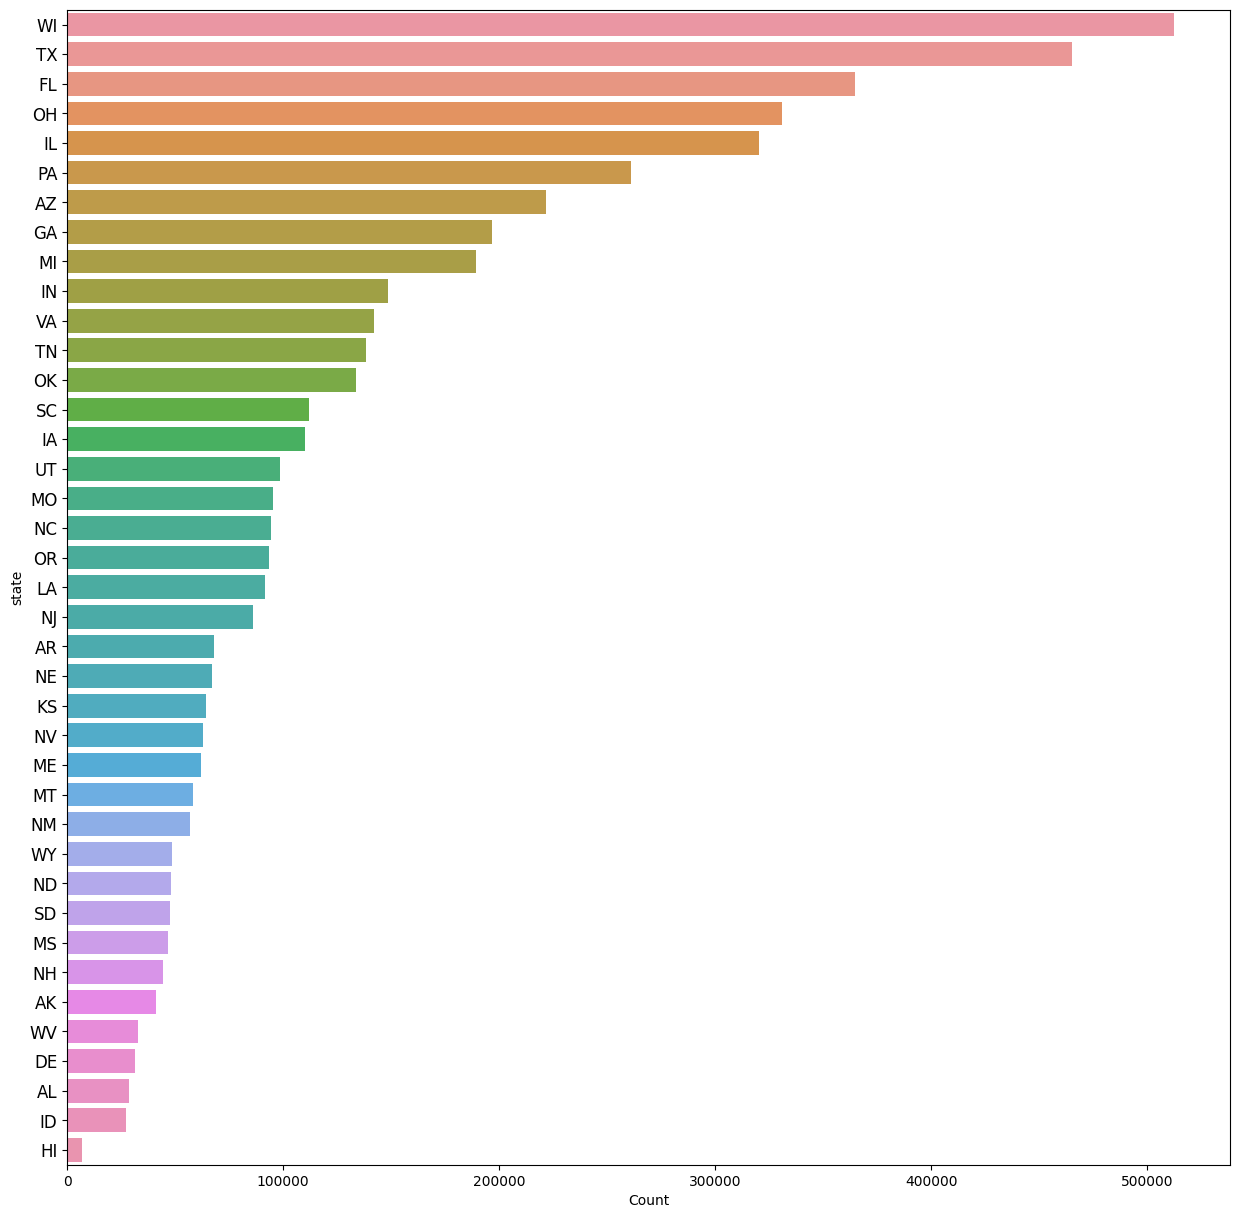

In [17]:
df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

In [13]:
benefits[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84  Routine Dental Services (Adult)   720
AL              28417    115  Routine Dental Services (Adult)   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Major Dental Care - Adult  3345
DE              31370    110              Orthodontia - Adult   602
FL             364742    194              Orthodontia - Child  5130
GA             196579    151  Routine Dental Services (Adult)  2893
HI               6741     76  Routine Dental Services (Adult)   110
IA             110221    104     Dental Check-Up for Children  1727
ID              27313     71     Dental Check-Up for Children   447
IL             320533    157              Orthodontia - Adult  4299
IN             148531    109        Major Dental Care - Adult  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125  Routine Dental Services (Adult)  1491
ME              61834     99        Basic Dental Care - Child   975
MI             189225    205        Basic Dental Care - Child  3248
MO              95152    127              Orthodontia - Child  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Basic Dental Care - Child  1049
NC              94290     98        Major Dental Care - Adult  1537
ND              48269     77                Accidental Dental   974
NE              66935     90        Major Dental Care - Adult  1238
NH              44305     98        Major Dental Care - Adult   707
NJ              86107    100              Orthodontia - Adult  1357
NM              56669     78              Orthodontia - Adult   828
NV              62743    121     Dental Check-Up for Children   930
OH             331045    193     Dental Check-Up for Children  5092
OK             133639     83        Major Dental Care - Adult  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157  Routine Dental Services (Adult)  4208
SC             111907     85              Orthodontia - Child  1817
SD              47730     79              Orthodontia - Adult   843
TN             138154    129        Basic Dental Care - Adult  2073
TX             465164    180                Accidental Dental  6441
UT              98421    101        Major Dental Care - Adult  1527
VA             142236    145                Accidental Dental  2256
WI             512587    146        Basic Dental Care - Adult  7135
WV              32638     77        Basic Dental Care - Child   625
WY              48425     92     Dental Check-Up for Children   807

**The figure and table both indicate top benefits are different among states.**

**Among all the benefits, Routine Dental Services, Orthodontia,and Basic Dental Care are the most popular services. Among those, TX, ND and VA has `Accidental Dental` as the most frequent benefits, which is worth noticing. The benefits frequency analysis can be coupled with insurance detail to calculate adjusted premium for up coming season, and can also accompanied with coverage information to calculate the population level dental health condition.**